In [1]:
from scipy.stats import zscore

from phd_journal.roma.plotting import *
from phd_journal.roma.combat_variations import *
from phd_journal.roma.read import *

#### I/O

In [2]:
datasets_paths = {
    "Newcastle": "/Volumes/MMIS-Saraiv/Datasets/Newcastle/EC/features_source_ind-bands",
    "Izmir": "/Volumes/MMIS-Saraiv/Datasets/Izmir/EC/features_source_ind-bands",
    "Sapienza": "/Volumes/MMIS-Saraiv/Datasets/Sapienza/features_source_ind-bands",
}

In [3]:
datasets_metadata_paths = {
    "Izmir": "/Volumes/MMIS-Saraiv/Datasets/Izmir/metadata.csv",
    "Sapienza": "/Volumes/MMIS-Saraiv/Datasets/Sapienza/metadata.csv",
    "Newcastle": "/Volumes/MMIS-Saraiv/Datasets/Newcastle/metadata.csv",
}

#### Read

In [4]:
# Read datasets
datasets = {}
for dataset_name, path in datasets_paths.items():
    dataset = read_dataset(path, label=dataset_name)
    datasets[dataset_name] = dataset

In [5]:
# Read metadata
datasets_metadata = {}
for dataset_name, path in datasets_metadata_paths.items():
    dataset = read_metadata(path, label=dataset_name)
    dataset['SITE'] = [s.split('-')[0] for s in dataset.index]
    datasets_metadata[dataset_name] = dataset

#### Before log transformation

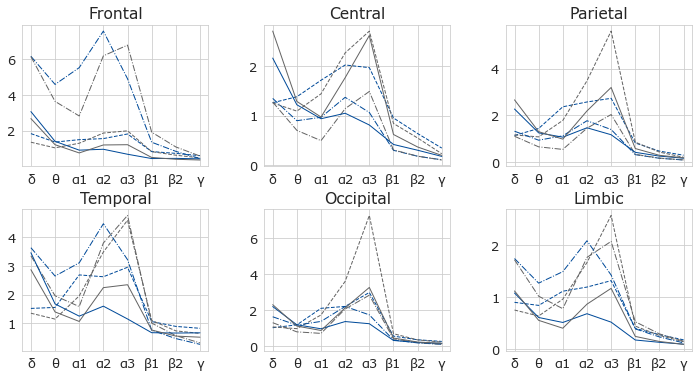

In [6]:
plot_mean_std_indep(datasets, datasets_metadata, log_scale=False)

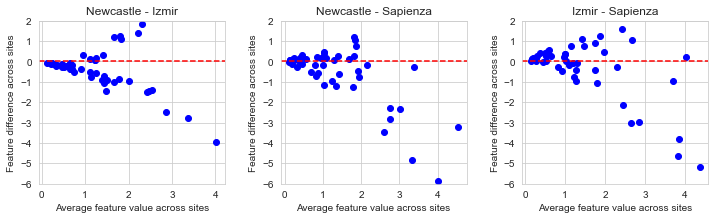

In [7]:
plot_mean_diffs(datasets)

In [8]:
# Check normality before
check_normality(datasets, datasets_metadata)
#create_qq_plots(datasets)

Checking normality for dataset: Newcastle
Number of normally distributed features: 8 out of 48
Checking normality for dataset: Izmir
Number of normally distributed features: 0 out of 48
Checking normality for dataset: Sapienza
Number of normally distributed features: 13 out of 48


#### Log transformation

In [6]:
# Approximate normality by log transformation
datasets = {dataset_name: intra_dataset_norm(dataset, method='log') for dataset_name, dataset in datasets.items()}

Checking normality for dataset: Newcastle
Number of normally distributed features: 42 out of 48
Checking normality for dataset: Izmir
Number of normally distributed features: 40 out of 48
Checking normality for dataset: Sapienza
Number of normally distributed features: 44 out of 48
Creating Q-Q plots for dataset: Newcastle


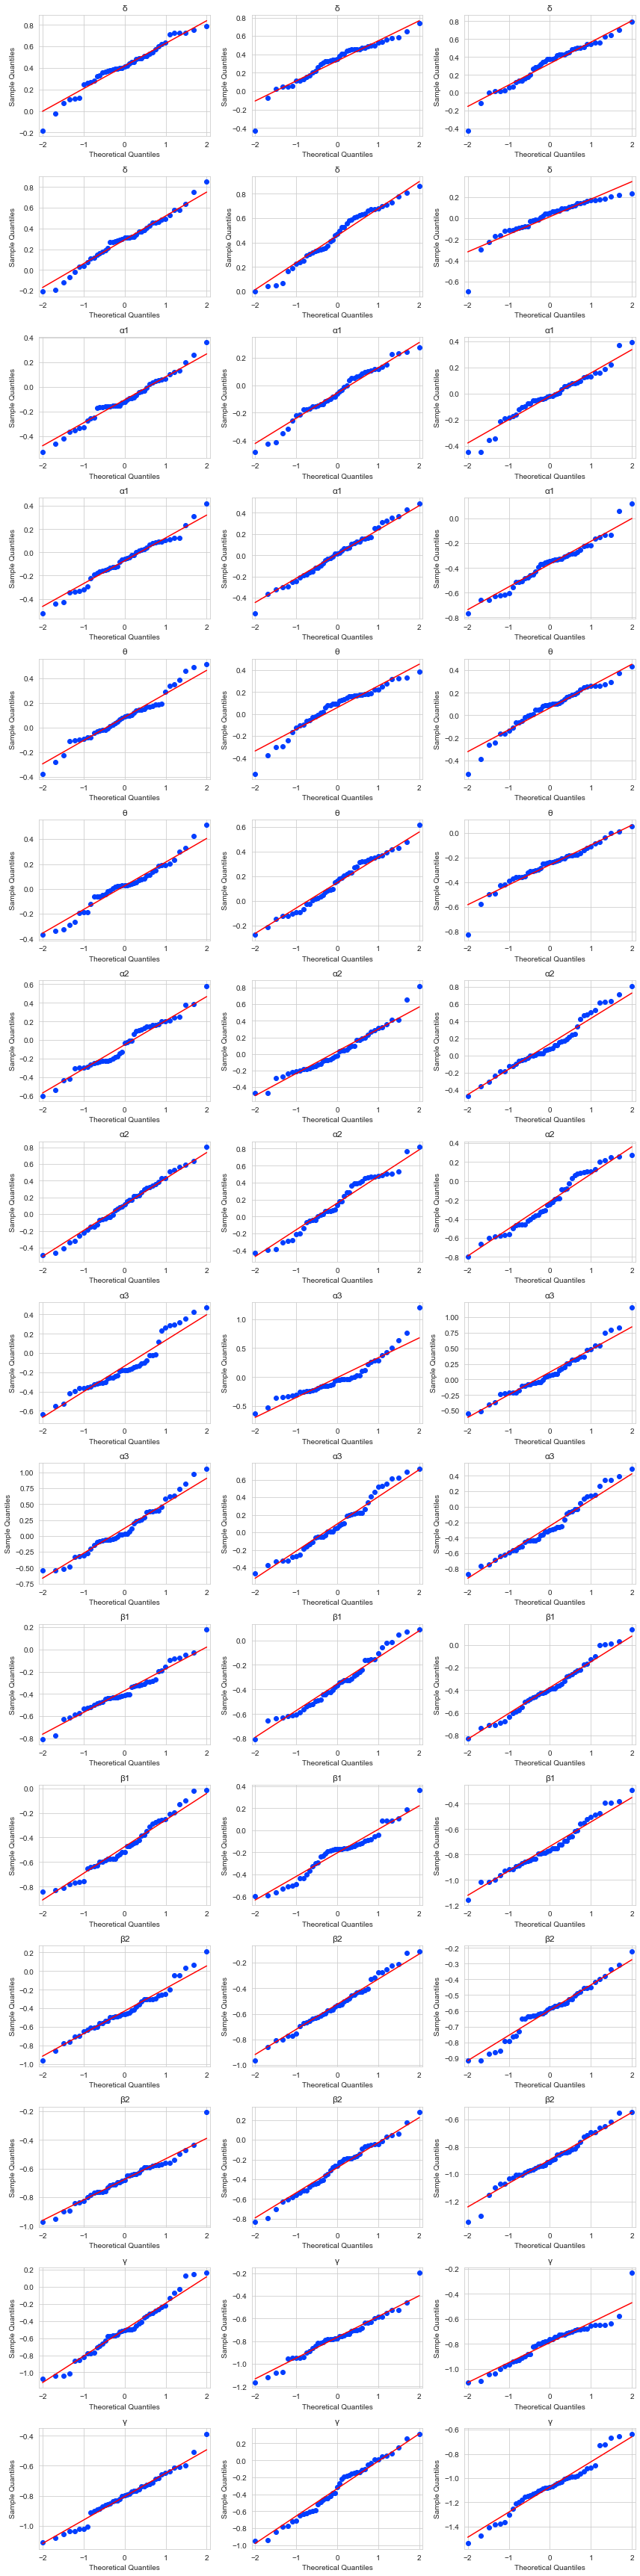

Creating Q-Q plots for dataset: Izmir


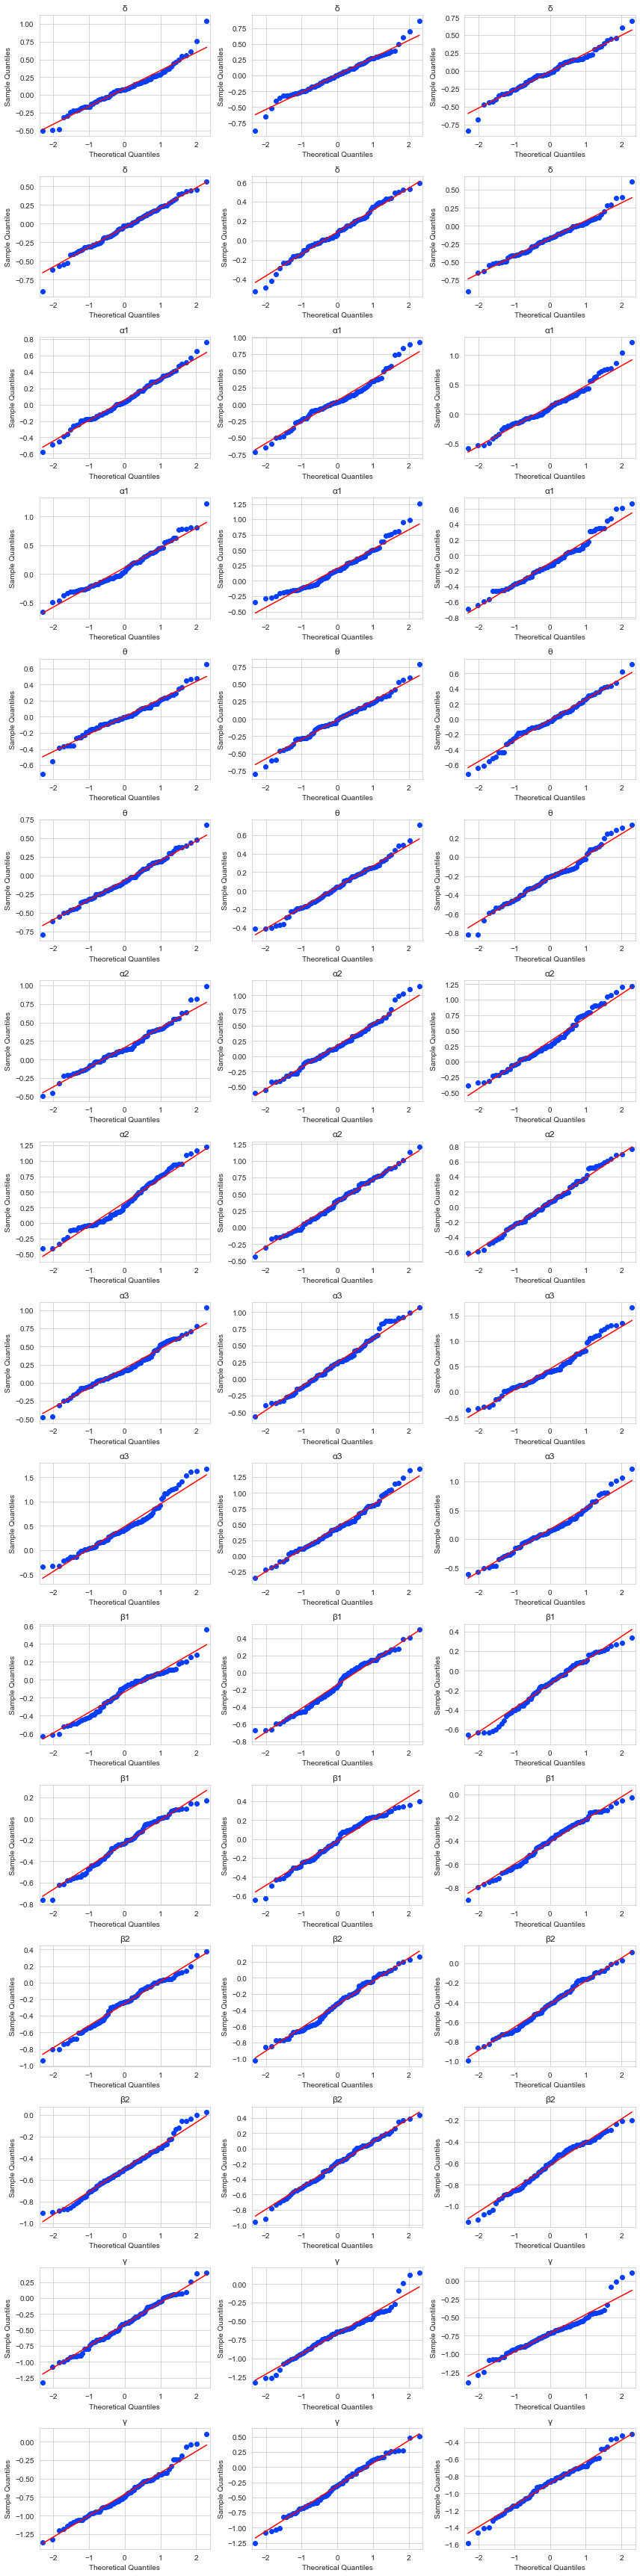

Creating Q-Q plots for dataset: Sapienza


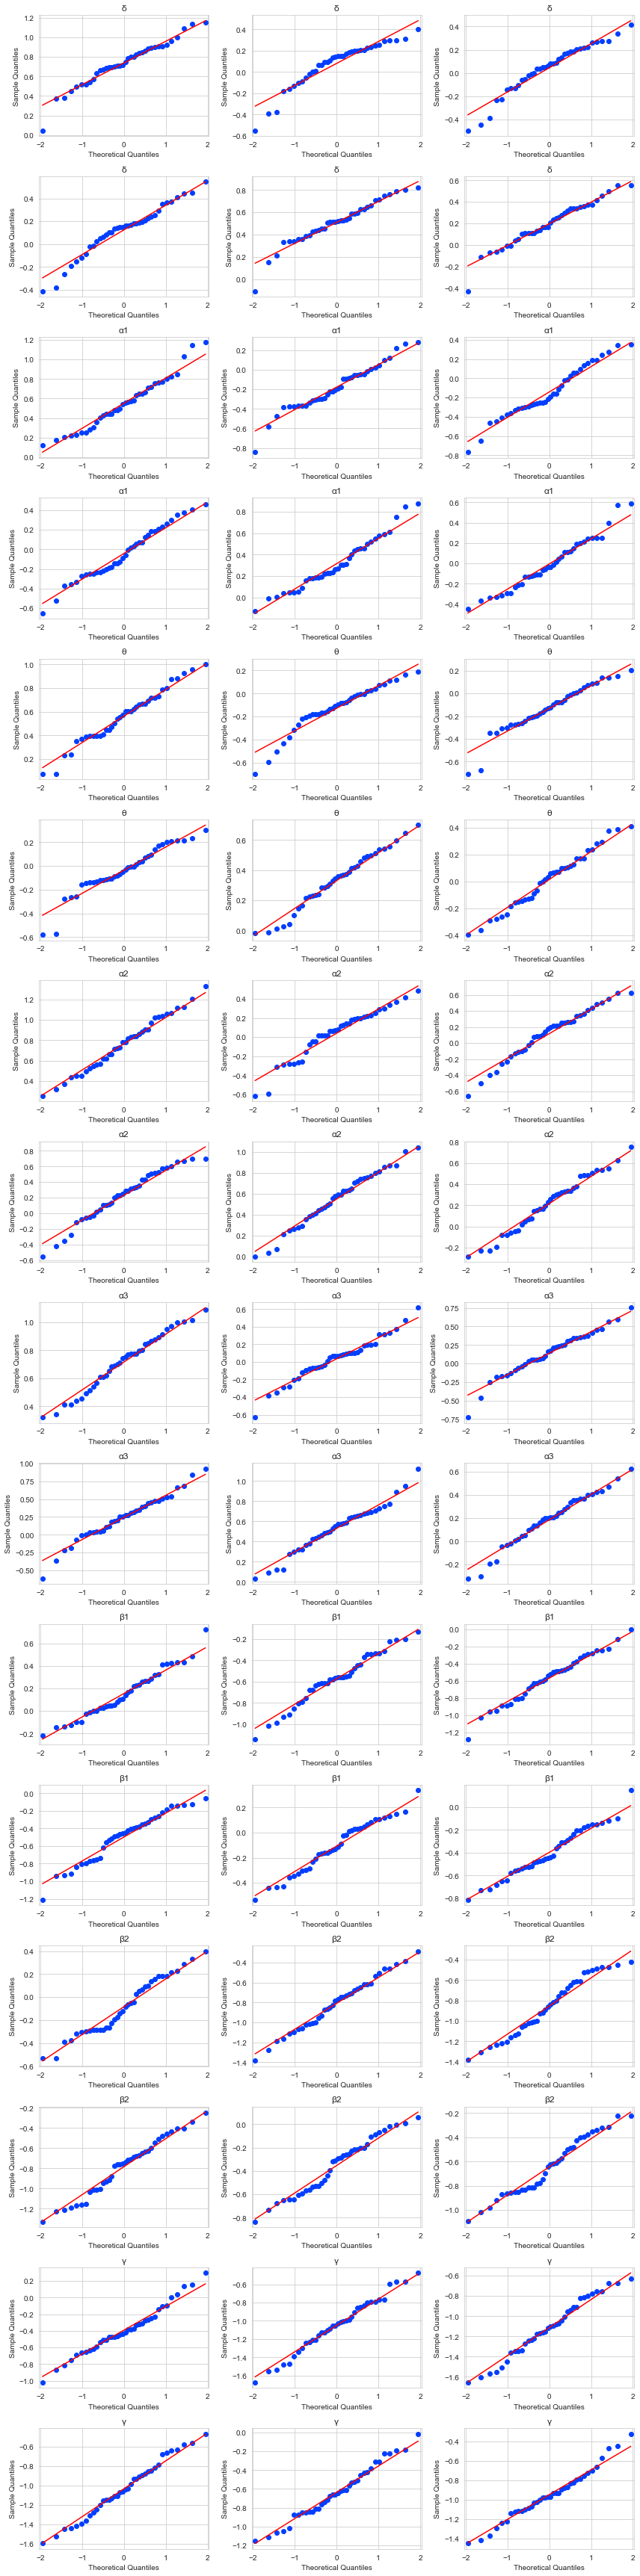

In [10]:
# Check normality after log
check_normality(datasets, datasets_metadata)
create_qq_plots(datasets)

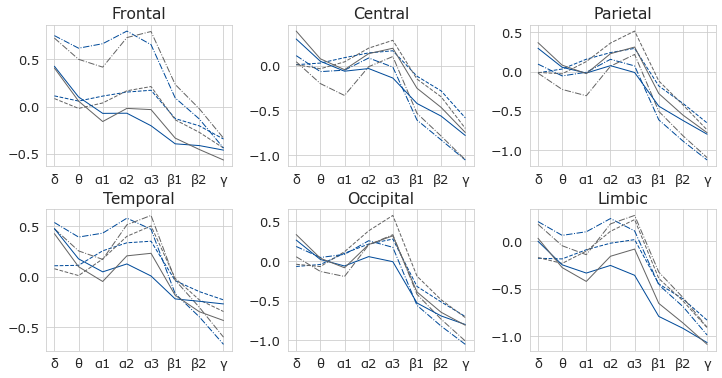

In [26]:
plot_mean_std_indep(datasets, datasets_metadata, log_scale=False)

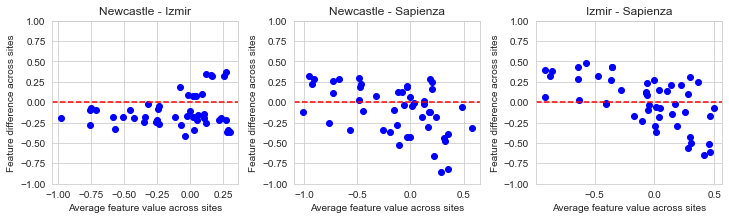

In [12]:
plot_mean_diffs(datasets, log=True)

#### Harmonisation

Covariates: Index(['AGE', 'GENDER', 'EDUCATION YEARS', 'SITE'], dtype='object')


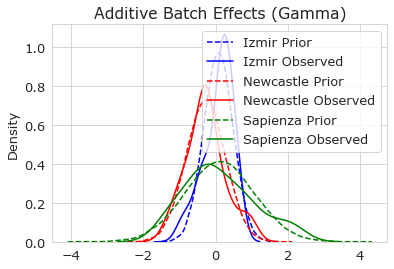

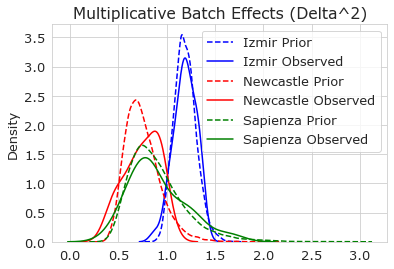

In [7]:
# Join all datasets and metadata
X = pd.concat(datasets.values())
all_metadata = pd.concat(datasets_metadata.values())
all_metadata = all_metadata.loc[X.index]  # keep only the metadata of the subjects in X
assert X.shape[0] == all_metadata.shape[0]
# NeuroHarmonize
X = neuro_harmonize(X, all_metadata, cov_age=True, cov_gender=True, cov_education=True, cov_diagnosis=False)
datasets_after = {dataset_name: X.loc[datasets[dataset_name].index] for dataset_name in datasets.keys()}

In [8]:
X = intra_dataset_norm(X, method='z-score')
# Put back as it was
datasets_after_zscore = {dataset_name: X.loc[datasets[dataset_name].index] for dataset_name in datasets.keys()}

In [9]:
# Undo log transformation
datasets_after_nolog = {dataset_name: np.power(10, dataset) for dataset_name, dataset in datasets_after.items()}

#### After harmonisation

In [12]:
# Check normality after COMBAT
check_normality(datasets_after, datasets_metadata)
#create_qq_plots(datasets)

Checking normality for dataset: Newcastle
Number of normally distributed features: 42 out of 48
Checking normality for dataset: Izmir
Number of normally distributed features: 40 out of 48
Checking normality for dataset: Sapienza
Number of normally distributed features: 44 out of 48


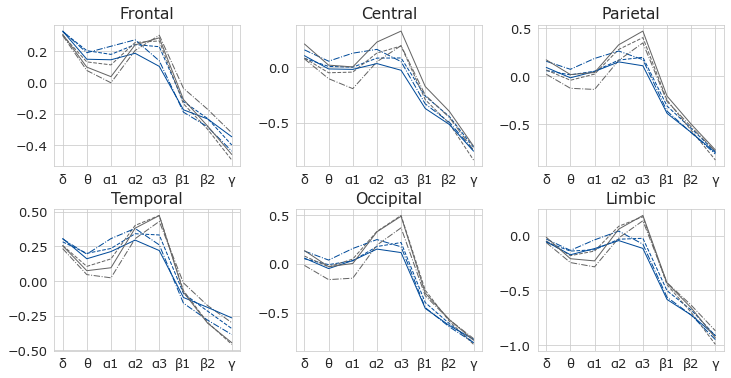

In [27]:
# Plot all regions
plot_mean_std_indep(datasets_after, datasets_metadata)

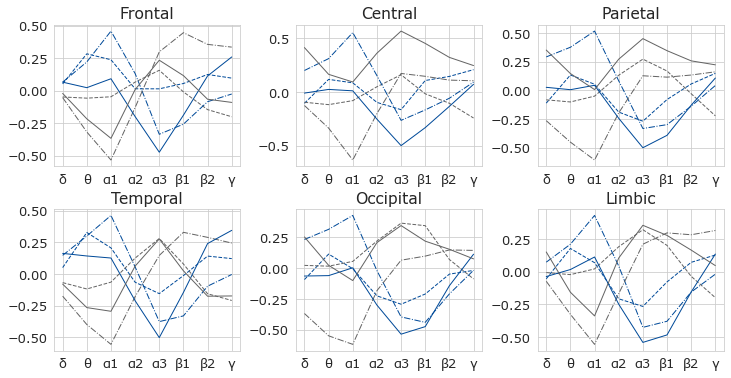

In [28]:
# Plot all regions (Z-score)
plot_mean_std_indep(datasets_after_zscore, datasets_metadata)

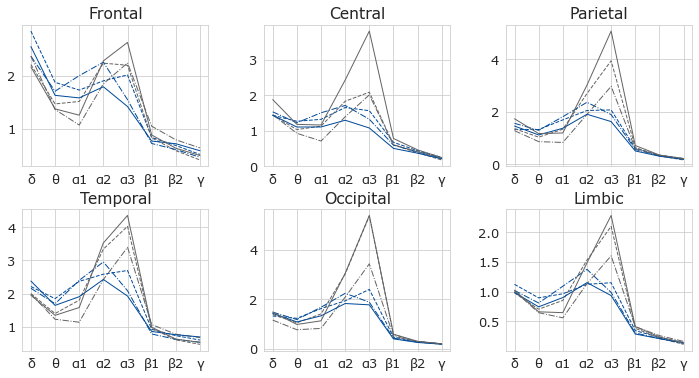

In [29]:
# Plot all regions (no log)
plot_mean_std_indep(datasets_after_nolog, datasets_metadata)

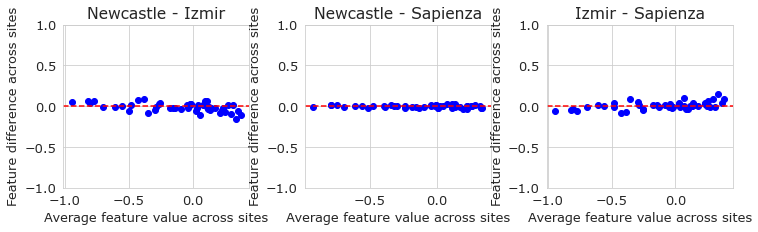

In [16]:
plot_mean_diffs(datasets_after, log=True)

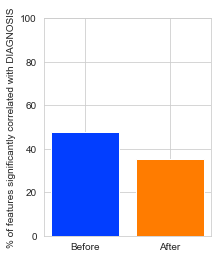

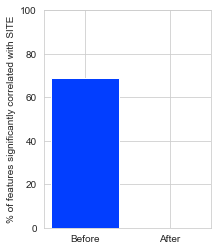

['Theta_Temporal',
 'Delta_Temporal',
 'Theta_Frontal',
 'Theta_Temporal',
 'Alpha1_Temporal',
 'Alpha1_Frontal',
 'Delta_Frontal',
 'Alpha1_Frontal',
 'Alpha1_Central',
 'Alpha1_Limbic',
 'Alpha1_Temporal',
 'Alpha1_Parietal',
 'Theta_Limbic',
 'Theta_Frontal',
 'Alpha2_Limbic',
 'Beta2_Limbic',
 'Alpha2_Occipital',
 'Beta2_Parietal',
 'Alpha2_Parietal',
 'Beta1_Temporal',
 'Alpha2_Occipital',
 'Beta1_Central',
 'Beta2_Occipital',
 'Beta1_Parietal',
 'Alpha3_Frontal',
 'Beta1_Limbic',
 'Alpha3_Central',
 'Alpha3_Temporal',
 'Alpha3_Temporal',
 'Beta1_Parietal',
 'Beta1_Limbic',
 'Beta1_Occipital',
 'Alpha3_Parietal',
 'Alpha3_Central',
 'Alpha3_Limbic',
 'Alpha3_Occipital',
 'Alpha3_Limbic',
 'Alpha3_Parietal',
 'Beta1_Occipital',
 'Alpha3_Occipital']

In [21]:
correlation_with_var(datasets, datasets_after, datasets_metadata, ("DIAGNOSIS", "SITE"))

Relevant features by RFE:
Index(['Alpha1_Occipital', 'Alpha1_Temporal', 'Theta_Temporal', 'Theta_Limbic',
       'Alpha2_Occipital', 'Alpha3_Parietal', 'Alpha3_Occipital',
       'Alpha3_Limbic', 'Beta1_Parietal', 'Beta1_Occipital'],
      dtype='object')
Before
{'0': {'precision': 0.7428571428571429, 'recall': 0.7959183673469388, 'f1-score': 0.768472906403941, 'support': 98}, '1': {'precision': 0.7014925373134329, 'recall': 0.6351351351351351, 'f1-score': 0.6666666666666666, 'support': 74}, 'accuracy': 0.7267441860465116, 'macro avg': {'precision': 0.7221748400852879, 'recall': 0.7155267512410369, 'f1-score': 0.7175697865353038, 'support': 172}, 'weighted avg': {'precision': 0.7250607427976398, 'recall': 0.7267441860465116, 'f1-score': 0.7246725474472065, 'support': 172}}
Relevant features by RFE:
Index(['Delta_Limbic', 'Alpha1_Central', 'Alpha1_Occipital', 'Alpha1_Temporal',
       'Alpha3_Central', 'Alpha3_Occipital', 'Alpha3_Temporal',
       'Alpha3_Limbic', 'Beta1_Parietal', 'Bet

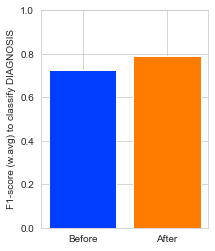

Relevant features by RFE:
Index(['Delta_Frontal', 'Delta_Central', 'Delta_Temporal', 'Delta_Limbic',
       'Alpha1_Frontal', 'Theta_Frontal', 'Alpha2_Frontal', 'Alpha3_Frontal',
       'Beta1_Frontal', 'Beta1_Limbic'],
      dtype='object')
Before
{'0': {'precision': 0.8604651162790697, 'recall': 0.8604651162790697, 'f1-score': 0.8604651162790697, 'support': 43}, '1': {'precision': 0.9111111111111111, 'recall': 0.9010989010989011, 'f1-score': 0.9060773480662984, 'support': 91}, '2': {'precision': 0.8717948717948718, 'recall': 0.8947368421052632, 'f1-score': 0.8831168831168831, 'support': 38}, 'accuracy': 0.8895348837209303, 'macro avg': {'precision': 0.8811236997283509, 'recall': 0.8854336198277447, 'f1-score': 0.8832197824874171, 'support': 172}, 'weighted avg': {'precision': 0.8897634665076525, 'recall': 0.8895348837209303, 'f1-score': 0.8896016292585738, 'support': 172}}
Relevant features by RFE:
Index(['Delta_Central', 'Delta_Parietal', 'Theta_Frontal', 'Alpha3_Frontal',
       'A

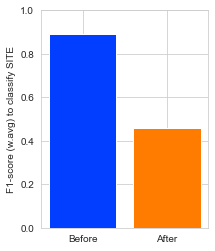

In [22]:
classification_with_var(datasets, datasets_after, datasets_metadata, ("DIAGNOSIS", "SITE"), relevant_features=None)

In [23]:
datasets_metadata['Izmir']

,DIAGNOSIS,AGE,GENDER,EDUCATION YEARS,MMSE,MMSEc,SITE
Izmir-12,AD,74,M,11,18.0,16.0,Izmir
Izmir-13,AD,77,M,11,20.0,19.0,Izmir
Izmir-14,AD,81,F,11,25.0,24.0,Izmir
Izmir-15,AD,72,F,5,24.0,23.0,Izmir
Izmir-16,AD,66,F,5,20.0,18.0,Izmir
...,...,...,...,...,...,...,...
Izmir-154,HC,58,F,15,30.0,30.0,Izmir
Izmir-155,HC,68,F,7,27.0,25.0,Izmir
Izmir-156,HC,70,M,20,29.0,26.0,Izmir
Izmir-157,HC,69,F,17,30.0,27.0,Izmir


Relevant features by RFE:
Index(['Alpha1_Parietal', 'Alpha1_Temporal', 'Theta_Frontal', 'Theta_Temporal',
       'Theta_Limbic', 'Alpha2_Occipital', 'Alpha3_Occipital', 'Alpha3_Limbic',
       'Beta1_Parietal', 'Beta1_Occipital'],
      dtype='object')
Before
RMSE: 4.38
R2: 0.2513121002931368
Relevant features by RFE:
Index(['Alpha1_Parietal', 'Alpha1_Temporal', 'Theta_Parietal',
       'Theta_Temporal', 'Theta_Limbic', 'Alpha3_Occipital', 'Alpha3_Limbic',
       'Beta1_Parietal', 'Beta1_Occipital', 'Beta2_Occipital'],
      dtype='object')
After
RMSE: 4.34
R2: 0.26645019564424044


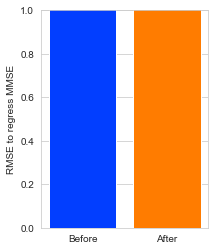

Relevant features by RFE:
Index(['Delta_Frontal', 'Delta_Limbic', 'Theta_Temporal', 'Alpha2_Central',
       'Alpha3_Frontal', 'Alpha3_Parietal', 'Alpha3_Occipital',
       'Beta1_Occipital', 'Beta2_Parietal', 'Gamma_Central'],
      dtype='object')
Before
RMSE: 7.74
R2: 0.19225471793341897
Relevant features by RFE:
Index(['Alpha1_Parietal', 'Alpha1_Temporal', 'Theta_Limbic', 'Alpha3_Frontal',
       'Alpha3_Occipital', 'Alpha3_Temporal', 'Beta1_Central',
       'Beta1_Occipital', 'Beta2_Frontal', 'Gamma_Parietal'],
      dtype='object')
After
RMSE: 7.57
R2: 0.22566529955168457


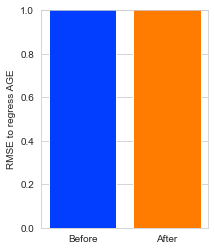

In [24]:
regression_with_var(datasets, datasets_after, datasets_metadata, ("MMSE", "AGE"), relevant_features=None)

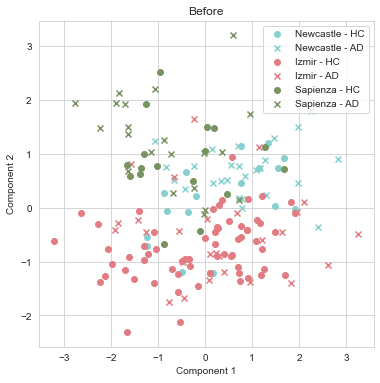

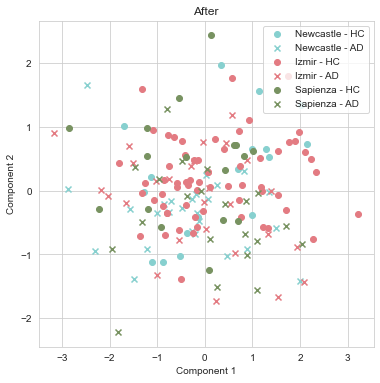

In [25]:
plot_2components(datasets, datasets_after, datasets_metadata, method='pca')

KeyError: 0

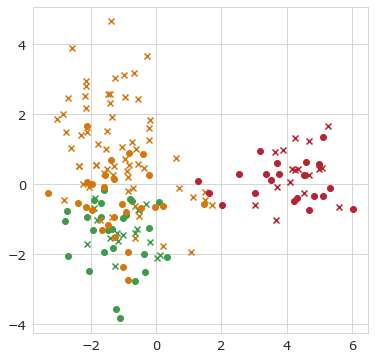

In [10]:
plot_2components(datasets, datasets_after, datasets_metadata, method='lda')

Before - F1-score: 0.89
After - F1-score: 0.63


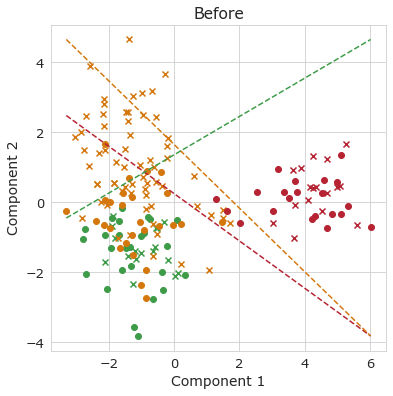

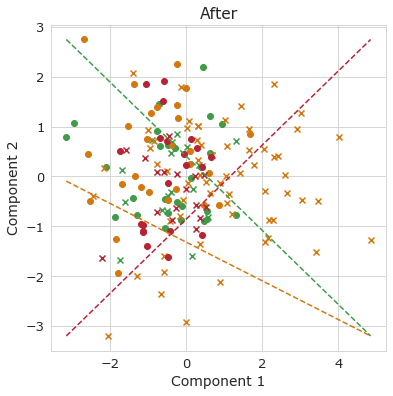

In [25]:
from sklearn.metrics import f1_score

method='lda'
_datasets_before = datasets
_datasets_after = datasets_after
_metadata = datasets_metadata
    
# Concatenate _datasets_before
_datasets_before = pd.concat(_datasets_before.values(), axis=0)
_datasets_after = pd.concat(_datasets_after.values(), axis=0)
_metadata = pd.concat(_metadata.values(), axis=0)

# Find 2 principal components of each dataset
if method == 'pca':
    before = PCA(n_components=2)
    after = PCA(n_components=2)
    before.fit(_datasets_before)
    after.fit(_datasets_after)
elif method == 'lda':  # Linear Discriminant Analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    before = LDA(n_components=2)
    after = LDA(n_components=2)
    _metadata = _metadata.loc[_metadata.index.intersection(_datasets_before.index)]
    before.fit(_datasets_before, _metadata["SITE"])
    after.fit(_datasets_after, _metadata["SITE"])
elif method == 'tsne':
    from sklearn.manifold import TSNE
    before = TSNE(n_components=2)
    after = TSNE(n_components=2)
    transformed_before = before.fit_transform(_datasets_before)
    transformed_after = after.fit_transform(_datasets_after)
else:
    raise ValueError("Invalid method")

# Transform data
if method != 'tsne':
    transformed_before = before.transform(_datasets_before)
    transformed_after = after.transform(_datasets_after)
transformed_before = pd.DataFrame(transformed_before, index=_datasets_before.index)
transformed_after = pd.DataFrame(transformed_after, index=_datasets_after.index)

# Plot stlyles
dataset_colors = {"Newcastle": [62, 156, 73], "Izmir": [212, 120, 14], "Sapienza": [182, 35, 50]}
dataset_colors = {l: [c / 255 for c in color] for l, color in dataset_colors.items()}
diagnoses_circles = {"HC": "x", "AD": "o"}

# One plot, all datasets
for version, (model, original, pc) in {"Before": (before, _datasets_before, transformed_before), "After": (after, _datasets_after, transformed_after)}.items():
    plt.figure(figsize=(6, 6))
    for dataset, color in dataset_colors.items():
        for diagnosis, marker in diagnoses_circles.items():
            idx = _metadata[(_metadata["DIAGNOSIS"] == diagnosis) & (_metadata["SITE"] == dataset)].index
            existing_idx = pc.index.intersection(idx)
            plt.scatter(pc[0].loc[existing_idx], pc[1].loc[existing_idx], color=color,
                        label=f"{dataset} - {diagnosis}", marker=marker)

    # Calculate and plot discriminant lines
    if method == 'lda':
        # X is the features in the reduced space (np.array)
        X = pc.to_numpy()
        
        # Find the min and max of the first component
        x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])
        
        # New LDA model for classification
        lda_model = LDA()
        result = lda_model.fit(X, _metadata["SITE"])
        
        # Plot the boundary lines
        for i, c in enumerate((dataset_colors["Sapienza"], dataset_colors["Izmir"], dataset_colors["Newcastle"])):
            b, w1, w2 = lda_model.intercept_[i], lda_model.coef_[i][0], lda_model.coef_[i][1]
            y1 = -(b+x1*w1)/w2
            
            # Reduce y1 if it goes out of the plot
            y1 = np.clip(y1, np.min(X[:,1], axis=0), np.max(X[:,1], axis=0))
            
            plt.plot(x1,y1,c=c, linestyle='--')
            
        # Get F1-score of classification
        y_pred = lda_model.predict(X)
        f1 = f1_score(_metadata["SITE"], y_pred, average='weighted')
        print(f"{version} - F1-score: {f1:.2f}")

    #plt.legend()
    plt.xlabel("Component 1", fontsize=14)
    plt.ylabel("Component 2", fontsize=14)
    plt.title(version)
    #plt.show()
    plt.savefig(join(plots_path, f"{method}_{version}.pdf"), dpi=300, transparent=True, bbox_inches='tight')

In [19]:
transformed_before

,0,1
Newcastle-53,0.335390,-2.075143
Newcastle-54,-1.235364,-3.549102
Newcastle-55,-0.211073,-1.232994
Newcastle-56,-1.889565,-0.437047
Newcastle-57,-1.356108,-1.267728
...,...,...
Sapienza-29,4.685706,0.273503
Sapienza-30,4.343718,0.441708
Sapienza-31,5.607318,-0.634829
Sapienza-32,4.251453,1.320109


/Users/saraiva/PycharmProjects/LTBio/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/saraiva/PycharmProjects/LTBio/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/saraiva/PycharmProjects/LTBio/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/saraiva/PycharmProjects/LTBio/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


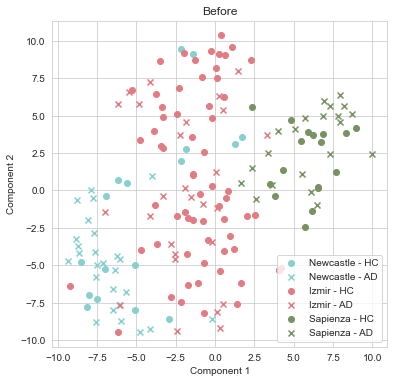

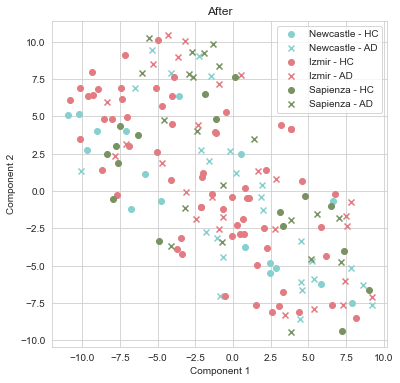

In [27]:
plot_2components(datasets, datasets_after, datasets_metadata, method='tsne')

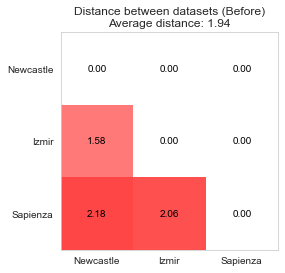

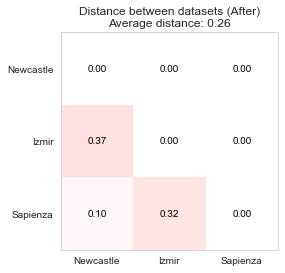

In [28]:
plot_distance_matrix(datasets, datasets_after, datasets_metadata)